# Regresión Logística
Aplicaremos la regresión lógistica expuesta en el módulo de clasificadores a un ejemplo de datos reales!. Estudiaremos un problema de clásificación binaria:

**Minización del riesgo de inversión y maximización de ganancia de un banco Aleman**

### Base de datos
En el siguiente [link](https://onlinecourses.science.psu.edu/stat857/node/215) encontraremos la base de datos. Los datos possen las siguietes variables:

**Credibilidad**: Corresponde a la variable binaria, tiene valor 0 si el crédito fue mal otorgado (es decir hubo problemas con el cliente) y 1 si el crédito fue bien otorgado. Esta es la variable que deseamos predecir usando regresión lógistica si es que no la conocieramos de ante mano. Como se conoce el valor, se puede hacer una estimación del error de predicción!!

**Account Balace**: Estado de cuenta de los clientes

* 1: Si es que no había cuenta al momento de pedir el crédito
* 2: Si la cuenta no tenía dinero al momento de pedir el crédito. 
* 3: Si  $0<$ dinero $\leq 200$ unidades monetarias. 
* 4: Si dinero $> 200$ unidades monetarias.

**Duration of Credit**: Duración en meses de los créditos otorgados!

** Payment Status of Previous Credit** : Estado de cuenta de los clientes

* 0: Si es un cliente vacilante, es decir, tiene un historial de problemas de pago con el banco.
* 1: Si es un cliente problematico en el sentido de que tenía créditos pendientes con otros bancos al momento de pedir crédito.
* 2: Si no tenía créditos anteriores o todos fueron pagados oportunamente.
* 3: Si tenía un credito con el banco al momento de su llegada y no tuvo problemas con este jamás.
* 4: Todos los créditos de ese banco fueron cancelados.

** Purpose **: Proposito del crédito 

* 0: Otro
* 1: Auto nuevo
* 2: Auto usado
* 3: Artículos de inmueble
* 4: Radio/ televisión
* 5: Electrodomésticos
* 6: Reparaciones
* 7: Educación
* 8: Vacaciones
* 9: Entretención
* 10: Negocios

** Credit Amount ** Dinero otorgado en el crédito

** Value Savings/Stock ** Valor de ahorro o acciones

** Length of current employment **: Cuanto llevaba trabajando el cliente al momento de pedir el crédito

* 1: Desempleado
* 2: Menor a un año
* 3: Mayor o igual a un año y menor que cuatro años
* 4: Mayor o igual a cuatro años y menor que 7 años
* 5: Mayor o igual a 7 años

** Instalment per cent ** Cuota en porcentaje de los ingresos disponibles

* 1: Mayor a 35%
* 2: Mayor o igual a 25% y menor que 35%
* 3: Mayor o igual a 20% y menor que 25%
* 4: Menor a 20%

** Sex & Marital Status **: Sexo y estado civil

* 1: Hombre divorciado
* 2: Hombre soltero
* 3: Hombre casado ó viudo
* 4: Mujer

** Duration in Current address **: Tiempo que llevaba viviendo en su dirección al momento de pedir crédito


In [26]:
### Importamos todas las librerías necesarias!!! ###
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [20]:
datos = pd.read_csv('german_credit.csv', header = 0)
print datos.shape
datos

(1000, 21)


,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
5,1,1,10,4,0,2241,1,2,1,3,...,3,1,48,3,1,2,2,2,1,2
6,1,1,8,4,0,3398,1,4,1,3,...,4,1,39,3,2,2,2,1,1,2
7,1,1,6,4,0,1361,1,2,2,3,...,4,1,40,3,2,1,2,2,1,2
8,1,4,18,4,3,1098,1,1,4,2,...,4,3,65,3,2,2,1,1,1,1
9,1,2,24,2,3,3758,3,1,1,2,...,4,4,23,3,1,1,1,1,1,1


## Análisis exploratorio de los datos

#### Cantidad de créditos bien otorgados y cantidad de créditos mal otorgados

In [24]:
datos['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

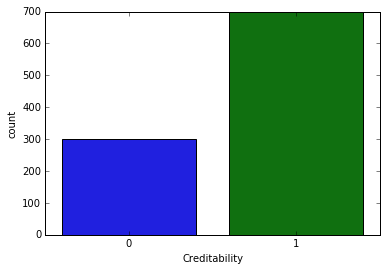

In [30]:
### Podemos gráficar usando seaborn ###
import seaborn as sns
sns.countplot(x = 'Creditability', data = datos)
plt.show()

In [31]:
### Calculamos los valore promedio  por cada clase de la variable Creditability ###
datos.groupby('Creditability').mean()

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
Creditability,,,,,,,,,,,,,,,,,,,,
0,1.903333,24.860000,2.166667,2.903333,3938.126667,1.673333,3.170000,3.096667,2.586667,1.126667,2.850000,2.586667,33.96,2.556667,1.913333,1.366667,2.936667,1.153333,1.376667,1.013333
1,2.865714,19.207143,2.707143,2.795714,2985.442857,2.290000,3.475714,2.920000,2.722857,1.152857,2.842857,2.260000,36.22,2.725714,1.934286,1.424286,2.890000,1.155714,1.415714,1.047143
